In [1]:
import numpy as np

class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    distinct_rows = N

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R


In [13]:
N = 100
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 1.5, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


4.0971547314764045
5.409899208542857
6.297533023690994
10.88174708657225
18.330691460998473
17.701181929338723
13.521700178304059
10.18452298616207
10.398253650854901
8.324482711840707
6.957733246888415
6.933326013704433
5.996682744285181
5.793418862454419
5.414041229845267
4.721176278913475
5.003023352784142
4.2821415732741
4.098944935584614
3.7280082786051048
3.821369898244259
3.7598466011079914
3.4994559786919623
3.1208026573873116
3.1029333610614387
2.897502965217364
2.710997326981751
2.703661174660982
2.950088540790497
2.5433606914300073
[4.0971547314764045, 5.409899208542857, 6.297533023690994, 10.88174708657225, 18.330691460998473, 17.701181929338723, 13.521700178304059, 10.18452298616207, 10.398253650854901, 8.324482711840707, 6.957733246888415, 6.933326013704433, 5.996682744285181, 5.793418862454419, 5.414041229845267, 4.721176278913475, 5.003023352784142, 4.2821415732741, 4.098944935584614, 3.7280082786051048, 3.821369898244259, 3.7598466011079914, 3.4994559786919623, 3.12080

In [14]:
p_mixing100 = [4.0971547314764045, 5.409899208542857, 6.297533023690994, 10.88174708657225, 18.330691460998473, 17.701181929338723, 13.521700178304059, 10.18452298616207, 10.398253650854901, 8.324482711840707, 6.957733246888415, 6.933326013704433, 5.996682744285181, 5.793418862454419, 5.414041229845267, 4.721176278913475, 5.003023352784142, 4.2821415732741, 4.098944935584614, 3.7280082786051048, 3.821369898244259, 3.7598466011079914, 3.4994559786919623, 3.1208026573873116, 3.1029333610614387, 2.897502965217364, 2.710997326981751, 2.703661174660982, 2.950088540790497, 2.5433606914300073]


In [11]:
N = 400
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 1.5, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


5.8832568236337925
7.0311698504415485
10.218605594052393
17.71679147746971
40.789542615780235
25.634466629309053
19.057515927740134
16.66410820949739
13.67600580936401
11.245219925384498
9.927484467702437
9.051594388740654
7.8824065152617475
7.731602985260395
6.7075958362170836
6.701050713921231
6.7514780672069845
5.9436994834036145
5.413676968181059
5.499678957940935
5.272921283231257
4.497945252558838
4.412336989418764
4.51135676444977
4.379379388979859
4.348033395476986
3.9045105068152344
3.966757876617732
3.4814738329255968
3.8609451141391418
[5.8832568236337925, 7.0311698504415485, 10.218605594052393, 17.71679147746971, 40.789542615780235, 25.634466629309053, 19.057515927740134, 16.66410820949739, 13.67600580936401, 11.245219925384498, 9.927484467702437, 9.051594388740654, 7.8824065152617475, 7.731602985260395, 6.7075958362170836, 6.701050713921231, 6.7514780672069845, 5.9436994834036145, 5.413676968181059, 5.499678957940935, 5.272921283231257, 4.497945252558838, 4.412336989418764

In [12]:
p_mixing400 = [5.8832568236337925, 7.0311698504415485, 10.218605594052393, 17.71679147746971, 40.789542615780235, 25.634466629309053, 19.057515927740134, 16.66410820949739, 13.67600580936401, 11.245219925384498, 9.927484467702437, 9.051594388740654, 7.8824065152617475, 7.731602985260395, 6.7075958362170836, 6.701050713921231, 6.7514780672069845, 5.9436994834036145, 5.413676968181059, 5.499678957940935, 5.272921283231257, 4.497945252558838, 4.412336989418764, 4.51135676444977, 4.379379388979859, 4.348033395476986, 3.9045105068152344, 3.966757876617732, 3.4814738329255968, 3.8609451141391418]


In [7]:
N = 1600
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 1.5, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


6.9469629409419085
9.257828814183299
12.382634547574783
28.032021184314164
63.51868103067229
35.69114224354888
24.95774447106077
19.928335818838214
15.83343159004237
14.307325752686058
13.32268894022821
11.61824199028977
10.097817447318292
9.94966914934849
9.49475416841233
8.031035740805114
8.5654064314789
7.654602969965575
7.0034014866885315
7.557887459725897
6.57526093769773
6.393706124303799
6.554789362198517
5.977786319294765
5.7055724253006375
5.5691602897041115
5.241592159620256
5.443224112169466
5.685129613964952
4.790261750329488
[6.9469629409419085, 9.257828814183299, 12.382634547574783, 28.032021184314164, 63.51868103067229, 35.69114224354888, 24.95774447106077, 19.928335818838214, 15.83343159004237, 14.307325752686058, 13.32268894022821, 11.61824199028977, 10.097817447318292, 9.94966914934849, 9.49475416841233, 8.031035740805114, 8.5654064314789, 7.654602969965575, 7.0034014866885315, 7.557887459725897, 6.57526093769773, 6.393706124303799, 6.554789362198517, 5.97778631929476

In [10]:
p_mixing1600 = [6.9469629409419085, 9.257828814183299, 12.382634547574783, 28.032021184314164, 63.51868103067229, 35.69114224354888, 24.95774447106077, 19.928335818838214, 15.83343159004237, 14.307325752686058, 13.32268894022821, 11.61824199028977, 10.097817447318292, 9.94966914934849, 9.49475416841233, 8.031035740805114, 8.5654064314789, 7.654602969965575, 7.0034014866885315, 7.557887459725897, 6.57526093769773, 6.393706124303799, 6.554789362198517, 5.977786319294765, 5.7055724253006375, 5.5691602897041115, 5.241592159620256, 5.443224112169466, 5.685129613964952, 4.790261750329488]


In [5]:
N = 6400
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 1.5, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


8.417109613481262
11.190149785947634
17.880678052214385
54.47559863609403
79.57942033687883
42.82126197209459
30.464117154070955
23.896386314069467
20.730201158914134
17.25662539162396
15.540578837910848
13.11305511897476
13.019107708689978
11.75122984813125
11.35499302963181
10.318919148612892
9.971745178321772
9.417013588660438
9.288488843563401
8.368845700179296
8.181317230516182
7.836091038391213
7.3931533516528365
7.2454488497083975
7.05564569629742
7.003271063566041
6.7648236881912025
6.313424742043
6.452071999622977
5.761730587408309
[8.417109613481262, 11.190149785947634, 17.880678052214385, 54.47559863609403, 79.57942033687883, 42.82126197209459, 30.464117154070955, 23.896386314069467, 20.730201158914134, 17.25662539162396, 15.540578837910848, 13.11305511897476, 13.019107708689978, 11.75122984813125, 11.35499302963181, 10.318919148612892, 9.971745178321772, 9.417013588660438, 9.288488843563401, 8.368845700179296, 8.181317230516182, 7.836091038391213, 7.3931533516528365, 7.2454

In [6]:
p_mixing6400 = [8.417109613481262, 11.190149785947634, 17.880678052214385, 54.47559863609403, 79.57942033687883, 42.82126197209459, 30.464117154070955, 23.896386314069467, 20.730201158914134, 17.25662539162396, 15.540578837910848, 13.11305511897476, 13.019107708689978, 11.75122984813125, 11.35499302963181, 10.318919148612892, 9.971745178321772, 9.417013588660438, 9.288488843563401, 8.368845700179296, 8.181317230516182, 7.836091038391213, 7.3931533516528365, 7.2454488497083975, 7.05564569629742, 7.003271063566041, 6.7648236881912025, 6.313424742043, 6.452071999622977, 5.761730587408309]


In [3]:
N =  25600
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 1.5, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


9.689702934210242
12.852066989401626
22.831644782206176
69.75915878919227
94.8775843272868
54.73704396699859
35.86187151628074
28.799349480763897
24.04176177285712
20.834479769988715
17.979759583981842
16.67716218554053
15.868375654485996
13.95338132640487
13.40899356618302
12.988254105727714
11.910158213053888
10.77091100672431
10.788700885847675
10.03070079900603
10.584900624876607
9.37483815944165
9.021649738421456
9.902459414169563
8.853544414860558
8.650170411212475
8.282619128286552
8.064474115364002
8.76342414778512
7.624952847500839
[9.689702934210242, 12.852066989401626, 22.831644782206176, 69.75915878919227, 94.8775843272868, 54.73704396699859, 35.86187151628074, 28.799349480763897, 24.04176177285712, 20.834479769988715, 17.979759583981842, 16.67716218554053, 15.868375654485996, 13.95338132640487, 13.40899356618302, 12.988254105727714, 11.910158213053888, 10.77091100672431, 10.788700885847675, 10.03070079900603, 10.584900624876607, 9.37483815944165, 9.021649738421456, 9.90245

In [4]:
p_mixing_25600 = [9.689702934210242, 12.852066989401626, 22.831644782206176, 69.75915878919227, 94.8775843272868, 54.73704396699859, 35.86187151628074, 28.799349480763897, 24.04176177285712, 20.834479769988715, 17.979759583981842, 16.67716218554053, 15.868375654485996, 13.95338132640487, 13.40899356618302, 12.988254105727714, 11.910158213053888, 10.77091100672431, 10.788700885847675, 10.03070079900603, 10.584900624876607, 9.37483815944165, 9.021649738421456, 9.902459414169563, 8.853544414860558, 8.650170411212475, 8.282619128286552, 8.064474115364002, 8.76342414778512, 7.624952847500839]


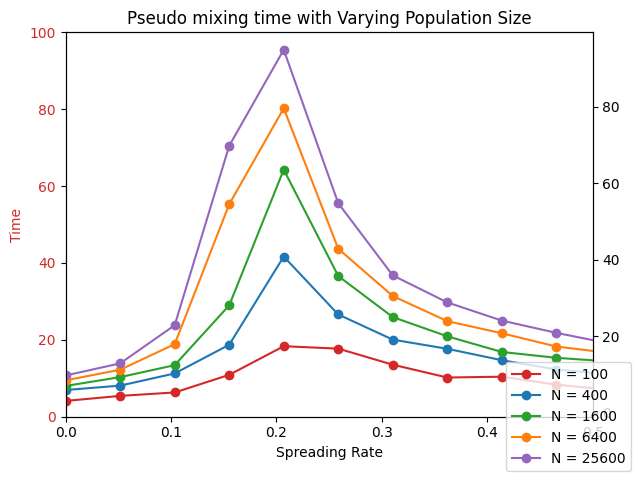

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b, p_mixing100, color=color, marker = 'o', label= 'N = 100')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 0.5)
ax1.set_ylim(0, 100)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(b, p_mixing400, color=color, marker = 'o', label = 'N = 400')

color = 'tab:green'
ax2.plot(b, p_mixing1600, color=color, marker = 'o', label = 'N = 1600')

color = 'tab:orange'
ax2.plot(b, p_mixing6400, color=color, marker = 'o', label = 'N = 6400')

color = 'tab:purple'
ax2.plot(b, p_mixing_25600, color=color, marker = 'o', label = 'N = 25600')

fig.legend(loc = 'lower right')
plt.title('Pseudo mixing time with Varying Population Size')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Zoom in on the peak (from 0 - 0.4)

In [3]:
N =  6400
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 0.4, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


8.145121358492052
8.76198713988136
9.078269993164819
10.85084851963296
10.91101279026795
12.718349411675828
14.864790888887523
15.952609727923326
18.043036037621043
24.676503151709092
32.87780600954808
39.84672313601287
94.56098785771388
157.66027344025662
105.4302237722698
78.52980326064989
66.27716444908943
51.85995237460961
46.83192164318275
41.9209986573555
37.5261943250657
34.5244929275341
31.374435136120706
29.134057863819624
26.97592321048403
25.430727144143454
25.034212702297474
23.14163150447112
22.117689720929732
20.806028310584274
[8.145121358492052, 8.76198713988136, 9.078269993164819, 10.85084851963296, 10.91101279026795, 12.718349411675828, 14.864790888887523, 15.952609727923326, 18.043036037621043, 24.676503151709092, 32.87780600954808, 39.84672313601287, 94.56098785771388, 157.66027344025662, 105.4302237722698, 78.52980326064989, 66.27716444908943, 51.85995237460961, 46.83192164318275, 41.9209986573555, 37.5261943250657, 34.5244929275341, 31.374435136120706, 29.13405786

In [4]:
pmixingpeak6400 = [8.145121358492052, 8.76198713988136, 9.078269993164819, 10.85084851963296, 10.91101279026795, 12.718349411675828, 14.864790888887523, 15.952609727923326, 18.043036037621043, 24.676503151709092, 32.87780600954808, 39.84672313601287, 94.56098785771388, 157.66027344025662, 105.4302237722698, 78.52980326064989, 66.27716444908943, 51.85995237460961, 46.83192164318275, 41.9209986573555, 37.5261943250657, 34.5244929275341, 31.374435136120706, 29.134057863819624, 26.97592321048403, 25.430727144143454, 25.034212702297474, 23.14163150447112, 22.117689720929732, 20.806028310584274]


In [5]:
N =  1600
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 0.4, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


7.247438718131799
7.230775647054832
8.16567515484385
8.566985388610458
8.925328084455625
10.298086299980607
12.040508148795318
11.707268481149056
13.735520962873641
17.33490592328142
20.358729302355734
33.10986481136329
46.331739959707434
92.78190291191063
69.07008037611952
65.75270777657104
50.936887764166144
43.24607132636146
36.79787826518208
34.67830981574133
29.87378001587349
28.76753925419856
25.702920816350645
23.478176375279844
23.22325964486484
20.92260133117905
19.276518895883015
18.593609097744455
18.079544889360893
17.095471269255842
[7.247438718131799, 7.230775647054832, 8.16567515484385, 8.566985388610458, 8.925328084455625, 10.298086299980607, 12.040508148795318, 11.707268481149056, 13.735520962873641, 17.33490592328142, 20.358729302355734, 33.10986481136329, 46.331739959707434, 92.78190291191063, 69.07008037611952, 65.75270777657104, 50.936887764166144, 43.24607132636146, 36.79787826518208, 34.67830981574133, 29.87378001587349, 28.76753925419856, 25.702920816350645, 23.

In [11]:
pmixingpeak1600 = [7.247438718131799, 7.230775647054832, 8.16567515484385, 8.566985388610458, 8.925328084455625, 10.298086299980607, 12.040508148795318, 11.707268481149056, 13.735520962873641, 17.33490592328142, 20.358729302355734, 33.10986481136329, 46.331739959707434, 92.78190291191063, 69.07008037611952, 65.75270777657104, 50.936887764166144, 43.24607132636146, 36.79787826518208, 34.67830981574133, 29.87378001587349, 28.76753925419856, 25.702920816350645, 23.478176375279844, 23.22325964486484, 20.92260133117905, 19.276518895883015, 18.593609097744455, 18.079544889360893, 17.095471269255842]


In [7]:
N =  400
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 0.4, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


5.770143470342182
5.6569426388757
6.409402180029572
6.2943784490344985
7.045189301335898
7.921808002952885
7.798216114760976
9.03970328705132
10.649424492308546
13.141362347157909
14.252568971247626
19.225174841088972
21.144187299413964
35.434689421055886
45.16982573808913
42.365376849006125
37.25156492759605
30.950088134943012
28.593253428730737
24.811391367086514
22.711230175345968
20.4405002260888
19.376788591311115
19.098828158439
17.75282206604349
15.792660168386252
15.95871932803487
14.631000467963855
13.412003029868464
13.217947838105228
[5.770143470342182, 5.6569426388757, 6.409402180029572, 6.2943784490344985, 7.045189301335898, 7.921808002952885, 7.798216114760976, 9.03970328705132, 10.649424492308546, 13.141362347157909, 14.252568971247626, 19.225174841088972, 21.144187299413964, 35.434689421055886, 45.16982573808913, 42.365376849006125, 37.25156492759605, 30.950088134943012, 28.593253428730737, 24.811391367086514, 22.711230175345968, 20.4405002260888, 19.376788591311115, 19

In [8]:
pmixingpeak400 = [5.770143470342182, 5.6569426388757, 6.409402180029572, 6.2943784490344985, 7.045189301335898, 7.921808002952885, 7.798216114760976, 9.03970328705132, 10.649424492308546, 13.141362347157909, 14.252568971247626, 19.225174841088972, 21.144187299413964, 35.434689421055886, 45.16982573808913, 42.365376849006125, 37.25156492759605, 30.950088134943012, 28.593253428730737, 24.811391367086514, 22.711230175345968, 20.4405002260888, 19.376788591311115, 19.098828158439, 17.75282206604349, 15.792660168386252, 15.95871932803487, 14.631000467963855, 13.412003029868464, 13.217947838105228]

In [9]:
N =  100
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 0.4, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


4.120964064742738
4.634495496230018
4.745297222840134
4.960887088243532
5.357377817769764
5.19563542864344
5.08531551835195
6.40503100813064
6.577499759563627
6.864498293710186
7.69049012794657
11.602490632275705
9.693442742187008
14.145383076074506
14.903114520614782
16.180771617996832
17.65351998376713
15.878925596804311
19.580364786712195
18.31721630993289
15.524444914606226
16.829746908819065
13.137721821817545
14.303951311421466
12.363040074882543
12.19492160098238
11.39869861009889
10.74435989746071
10.643253018364984
9.743305937059226
[4.120964064742738, 4.634495496230018, 4.745297222840134, 4.960887088243532, 5.357377817769764, 5.19563542864344, 5.08531551835195, 6.40503100813064, 6.577499759563627, 6.864498293710186, 7.69049012794657, 11.602490632275705, 9.693442742187008, 14.145383076074506, 14.903114520614782, 16.180771617996832, 17.65351998376713, 15.878925596804311, 19.580364786712195, 18.31721630993289, 15.524444914606226, 16.829746908819065, 13.137721821817545, 14.303951

In [10]:
pmixingpeak100 = [4.120964064742738, 4.634495496230018, 4.745297222840134, 4.960887088243532, 5.357377817769764, 5.19563542864344, 5.08531551835195, 6.40503100813064, 6.577499759563627, 6.864498293710186, 7.69049012794657, 11.602490632275705, 9.693442742187008, 14.145383076074506, 14.903114520614782, 16.180771617996832, 17.65351998376713, 15.878925596804311, 19.580364786712195, 18.31721630993289, 15.524444914606226, 16.829746908819065, 13.137721821817545, 14.303951311421466, 12.363040074882543, 12.19492160098238, 11.39869861009889, 10.74435989746071, 10.643253018364984, 9.743305937059226]


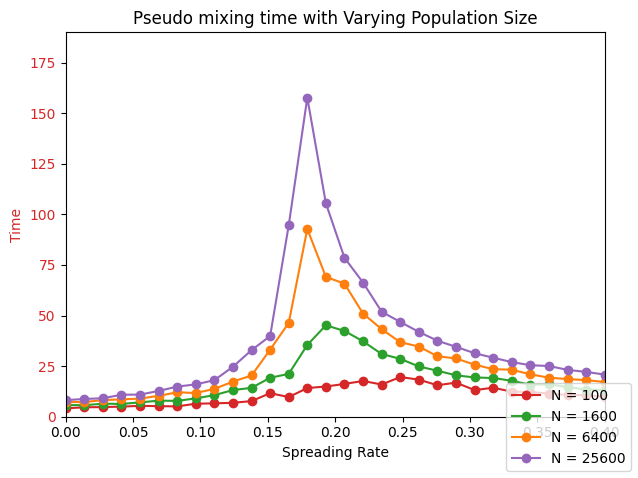

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b, pmixingpeak100, color=color, marker = 'o', label= 'N = 100')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 0.4)
ax1.set_ylim(0, 190)

color = 'tab:green'
ax1.plot(b, pmixingpeak400, color=color, marker = 'o', label = 'N = 1600')

color = 'tab:orange'
ax1.plot(b, pmixingpeak1600, color=color, marker = 'o', label = 'N = 6400')

color = 'tab:purple'
ax1.plot(b, pmixingpeak6400, color=color, marker = 'o', label = 'N = 25600')

fig.legend(loc = 'lower right')
plt.title('Pseudo mixing time with Varying Population Size')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
